# Import Libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Import Data

1. read data
2. clean data

### Read Data

In [2]:
# list all files in Analysis folder
files = os.listdir('Analysis')
print(files)
files.remove('wrangler_digit_span_log.xlsx')
files.remove('wraight_digit_span_log.xlsx')
files.remove('wraight_digit_span_log.csv')
print(files)

['wager_digit_span_log.csv', 'werbler_digit_span_log.csv', 'wobbler_digit_span_log.csv', 'wraight_digit_span_log.csv', 'wraight_digit_span_log.xlsx', 'wrangler_digit_span_log.xlsx']
['wager_digit_span_log.csv', 'werbler_digit_span_log.csv', 'wobbler_digit_span_log.csv']


In [3]:
# create empty dataframe
df_merged_main = pd.DataFrame()

# loop through all files in Analysis folder and merge them into one dataframe
for file in files:
    df = pd.read_csv('Analysis/' + file, dtype=str)
    df_merged_main = pd.concat([df_merged_main, df], ignore_index=True)

# format csv dates to datetime objects
df_merged_main['date'] = pd.to_datetime(df_merged_main['date'], dayfirst=True)
df_merged_main['date'] = df_merged_main['date'].dt.strftime('%Y-%m-%d %H:%M:%S')

# load wrangler digit span log from xlsx and concat
df_wrangler = pd.read_excel('Analysis/wrangler_digit_span_log.xlsx', dtype=str)
df_merged_main = pd.concat([df_merged_main, df_wrangler], ignore_index=True)

# load wrangler digit span log from xlsx and concat
df_wraight = pd.read_excel('Analysis/wraight_digit_span_log.xlsx', dtype=str)
df_merged_main = pd.concat([df_merged_main, df_wraight], ignore_index=True)

# drop column feedback
df_merged_main = df_merged_main.drop(columns=['feedback'])

In [4]:
df_merged_main

,user_name,date,time,session_nr,loop_nr,presented_sequence,recalled_sequence,outcome,mistakes_in_a_row,recall_time_in_s,...,digit_length,session_time,time_between_digits,memory_method,tiredness,physical_activity,mental_state,motivation,location,session_mode
0,wager,2023-11-23 00:00:00,08:53:50,1,1,121,121,correct,0,5.197617769241333,...,3,00:00:08,0.0,11,5,0,6,7,5,3
1,wager,2023-11-23 00:00:00,08:54:05,1,2,8409,8349,incorrect,1,3.437217950820923,...,4,00:00:23,0.0,11,5,0,6,7,5,3
2,wager,2023-11-23 00:00:00,08:54:26,1,3,7125,7125,correct,0,9.537040948867798,...,4,00:00:44,0.0,11,5,0,6,7,5,3
3,wager,2023-11-23 00:00:00,08:54:42,1,4,64692,64692,correct,0,3.8744049072265625,...,5,00:01:00,0.0,11,5,0,6,7,5,3
4,wager,2023-11-23 00:00:00,08:54:59,1,5,61352,16352,incorrect,1,5.897935152053833,...,6,00:01:17,0.0,11,5,0,6,7,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129,wraight,2023-12-19 00:00:00,22:38:54,35,14,751170645,751170645,correct,0,9.30053854,...,9,00:12:14,0,"6, 7",4,30,5,2,5,2
3130,wraight,2023-12-19 00:00:00,22:40:19,35,15,4397482031,8087482031,incorrect,1,13.83201432,...,10,00:13:40,0,"6, 7",4,30,5,2,5,2
3131,wraight,2023-12-19 00:00:00,22:40:45,35,16,8792138720,928720,incorrect,2,12.52703476,...,10,00:14:05,0,"6, 7",4,30,5,2,5,2
3132,wraight,2023-12-19 00:00:00,22:41:27,35,17,654226768,426526768,incorrect,3,8.65895009,...,9,00:14:47,0,"6, 7",4,30,5,2,5,2


In [5]:
df_merged_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_name            3134 non-null   object
 1   date                 3129 non-null   object
 2   time                 3129 non-null   object
 3   session_nr           3129 non-null   object
 4   loop_nr              3129 non-null   object
 5   presented_sequence   3129 non-null   object
 6   recalled_sequence    2846 non-null   object
 7   outcome              3129 non-null   object
 8   mistakes_in_a_row    3129 non-null   object
 9   recall_time_in_s     3129 non-null   object
 10  sound_model          3129 non-null   object
 11  digit_length         3129 non-null   object
 12  session_time         3129 non-null   object
 13  time_between_digits  3129 non-null   object
 14  memory_method        3022 non-null   object
 15  tiredness            3129 non-null   object
 16  physic

In [6]:
# save df_merged_main to xlsx
#df_merged_main.to_excel('Analysis/TEST.xlsx', index=False)

### Data Cleaning

In [7]:
# dropna in digit_length column
df_merged_main = df_merged_main.dropna(subset=['digit_length'])

# format digit_length as int
df_merged_main['digit_length'] = df_merged_main['digit_length'].astype(int)

# format session_mode as int
df_merged_main['session_mode'] = df_merged_main['session_mode'].astype(int)

# format session_nr as int
df_merged_main['session_nr'] = df_merged_main['session_nr'].astype(int)

# format time as time HH:MM:SS
df_merged_main['time'] = pd.to_datetime(df_merged_main['time'], format='%H:%M:%S')

# format date as datetime YYYY-MM-DD
df_merged_main['date'] = pd.to_datetime(df_merged_main['date'], format='%Y-%m-%d %H:%M:%S')

# format session_time as HH:MM:SS
df_merged_main['session_time'] = pd.to_datetime(df_merged_main['session_time'], format='%H:%M:%S')

# format mistakes_in_a_row as int
df_merged_main['mistakes_in_a_row'] = df_merged_main['mistakes_in_a_row'].astype(int)

# format sound_model as int
df_merged_main['sound_model'] = df_merged_main['sound_model'].astype(int)

# format recall_time_in_s as float and drop if error
df_merged_main['recall_time_in_s'] = pd.to_numeric(df_merged_main['recall_time_in_s'], errors='coerce')

# format time_between_digits as float and drop if error
df_merged_main['time_between_digits'] = pd.to_numeric(df_merged_main['time_between_digits'], errors='coerce')

# format memory_method, tiredness, physical_activity, mental_state, motivation, location as int
df_merged_main['tiredness'] = df_merged_main['tiredness'].astype(int)
df_merged_main['physical_activity'] = df_merged_main['physical_activity'].astype(int)
df_merged_main['mental_state'] = df_merged_main['mental_state'].astype(int)
df_merged_main['motivation'] = df_merged_main['motivation'].astype(int)
df_merged_main['location'] = df_merged_main['location'].astype(int)

C:\Users\peter\AppData\Local\Temp\ipykernel_29772\790851864.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_main['digit_length'] = df_merged_main['digit_length'].astype(int)
C:\Users\peter\AppData\Local\Temp\ipykernel_29772\790851864.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_main['session_mode'] = df_merged_main['session_mode'].astype(int)
C:\Users\peter\AppData\Local\Temp\ipykernel_29772\790851864.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [8]:
df_merged_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3129 entries, 0 to 3133
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_name            3129 non-null   object        
 1   date                 3129 non-null   datetime64[ns]
 2   time                 3129 non-null   datetime64[ns]
 3   session_nr           3129 non-null   int32         
 4   loop_nr              3129 non-null   object        
 5   presented_sequence   3129 non-null   object        
 6   recalled_sequence    2846 non-null   object        
 7   outcome              3129 non-null   object        
 8   mistakes_in_a_row    3129 non-null   int32         
 9   recall_time_in_s     3128 non-null   float64       
 10  sound_model          3129 non-null   int32         
 11  digit_length         3129 non-null   int32         
 12  session_time         3129 non-null   datetime64[ns]
 13  time_between_digits  3129 non-null   f

In [9]:
df_merged_main['user_name'].unique()

array(['wager', 'werbler', 'wobbler', 'wrangler', 'wraight'], dtype=object)

In [55]:
# Ensure the data is sorted by user_name and session_nr
df_merged_main.sort_values(by=['user_name', 'session_nr'], inplace=True)

# Filter data where session_mode = 2
df_mode_2 = df_merged_main[df_merged_main['session_mode'] == 2]

# Creating a function to reset counter when the user name changes
def reset_counter(group):
    counter = (group['session_nr'] != group['session_nr'].shift()).cumsum()
    return counter

# Apply the function to each group (user)
df_mode_2['test_session_nr'] = df_mode_2.groupby('user_name').apply(reset_counter).reset_index(level=0, drop=True)

# The 'test_session_nr' column now increases for each session and resets for each new user

# Sample code to display the modified dataframe (for verification)
df_mode_2.tail(30)

C:\Users\peter\AppData\Local\Temp\ipykernel_29772\1531472666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_main.sort_values(by=['user_name', 'session_nr'], inplace=True)
C:\Users\peter\AppData\Local\Temp\ipykernel_29772\1531472666.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mode_2['test_session_nr'] = df_mode_2.groupby('user_name').apply(reset_counter).reset_index(level=0, drop=True)


,user_name,date,time,session_nr,loop_nr,presented_sequence,recalled_sequence,outcome,mistakes_in_a_row,recall_time_in_s,...,session_time,time_between_digits,memory_method,tiredness,physical_activity,mental_state,motivation,location,session_mode,test_session_nr
2565,wrangler,2023-12-13,1900-01-01 21:51:07,22,15,1662366882,16662366882,incorrect,3,34.189550,...,1900-01-01 00:11:28,0.0,6,6,0,3,3,8,2,18
2566,wrangler,2023-12-13,1900-01-01 21:51:58,22,16,174441548,17444154,incorrect,4,42.938595,...,1900-01-01 00:12:19,0.0,6,6,0,3,3,8,2,18
2567,wrangler,2023-12-13,1900-01-01 21:52:43,22,17,19051925,19074925,incorrect,5,37.763133,...,1900-01-01 00:13:04,0.0,6,6,0,3,3,8,2,18
2568,wrangler,2023-12-13,1900-01-01 21:53:11,22,18,5152027,50152027,incorrect,6,21.356083,...,1900-01-01 00:13:32,0.0,6,6,0,3,3,8,2,18
2569,wrangler,2023-12-13,1900-01-01 21:53:39,22,19,889785,889785,correct,0,22.752072,...,1900-01-01 00:14:00,0.0,6,6,0,3,3,8,2,18
2570,wrangler,2023-12-13,1900-01-01 21:53:55,22,20,4088317,408831,incorrect,1,9.509307,...,1900-01-01 00:14:16,0.0,6,6,0,3,3,8,2,18
2571,wrangler,2023-12-13,1900-01-01 21:54:26,22,21,3135323,3135323,correct,0,24.405434,...,1900-01-01 00:14:47,0.0,6,6,0,3,3,8,2,18
2572,wrangler,2023-12-13,1900-01-01 21:55:10,22,22,00313696,00313696,correct,0,36.585295,...,1900-01-01 00:15:31,0.0,6,6,0,3,3,8,2,18
2573,wrangler,2023-12-14,1900-01-01 22:15:55,23,1,195152298,195119,incorrect,1,8.818347,...,1900-01-01 00:00:09,0.0,6,8,90,2,2,8,2,19
2574,wrangler,2023-12-14,1900-01-01 22:16:22,23,2,174502829,175402829,incorrect,2,18.181653,...,1900-01-01 00:00:27,0.0,6,8,90,2,2,8,2,19


# Data Analysis

1. base test results
2. max
3. motivation vs performance etc

### Base Test Results

In [10]:
df_baseline = df_merged_main[df_merged_main['session_mode'] == 3]

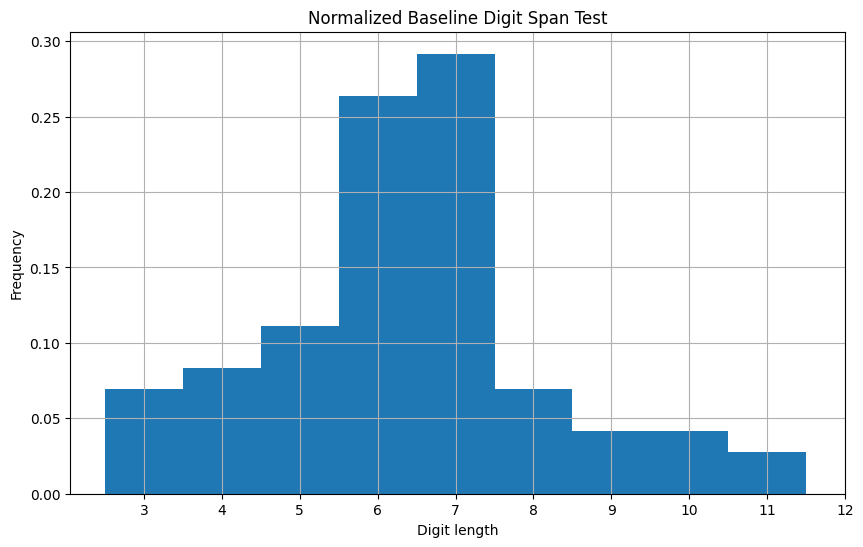

In [11]:
# plot histogram of baseline using plt in range of 1 to 14
plt.figure(figsize=(10, 6))

# normalize to 1 and where outcome is correct
plt.hist(df_baseline['digit_length'], bins=range(3, 13), density=True)

plt.title('Normalized Baseline Digit Span Test')
plt.xlabel('Digit length')
plt.ylabel('Frequency')

# move x tick labels to center of bars
plt.xticks([i + 0.5 for i in range(3, 13)], [i for i in range(3, 13)])

plt.grid(True)

plt.show()

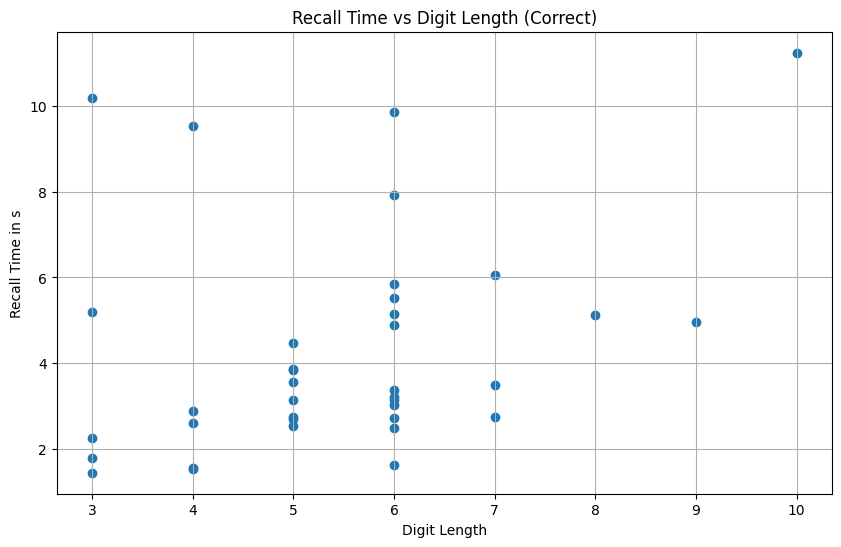

In [12]:
# plot recall time vs digit length
plt.figure(figsize=(10, 6))

plt.scatter(df_baseline[df_baseline['outcome'] == 'correct']['digit_length'], df_baseline[df_baseline['outcome'] == 'correct']['recall_time_in_s'])

plt.title('Recall Time vs Digit Length (Correct)')
plt.xlabel('Digit Length')
plt.ylabel('Recall Time in s')

plt.grid(True)

plt.show()

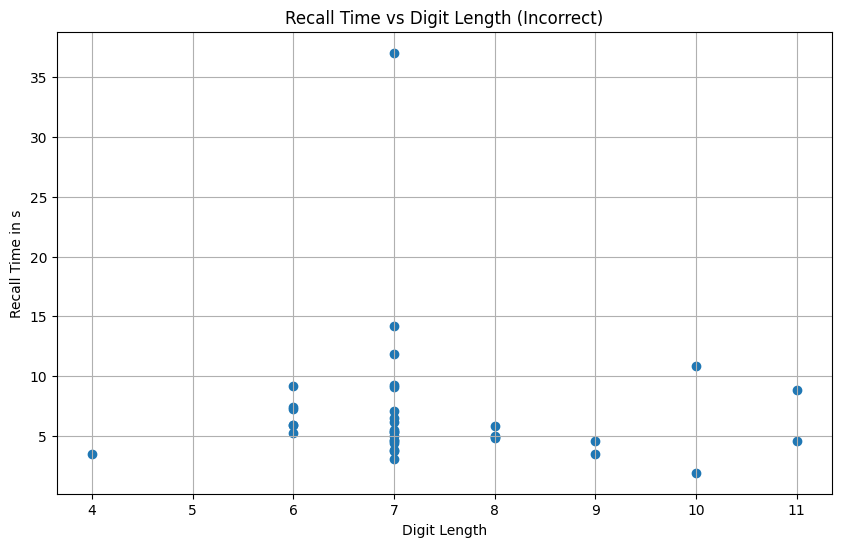

In [13]:
# plot recall time vs digit length
plt.figure(figsize=(10, 6))

plt.scatter(df_baseline[df_baseline['outcome'] == 'incorrect']['digit_length'], df_baseline[df_baseline['outcome'] == 'incorrect']['recall_time_in_s'])

plt.title('Recall Time vs Digit Length (Incorrect)')
plt.xlabel('Digit Length')
plt.ylabel('Recall Time in s')

plt.grid(True)

plt.show()

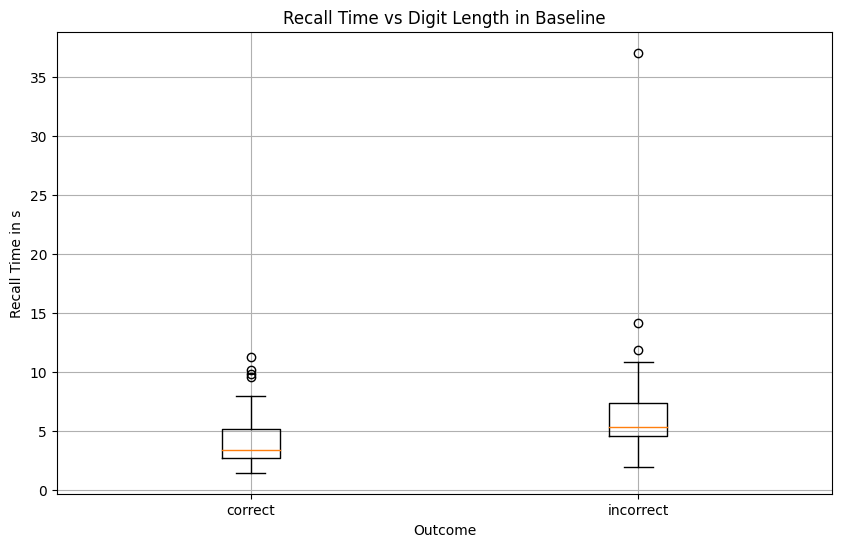

In [14]:
# boxplot of recall time vs digit length
plt.figure(figsize=(10, 6))

plt.boxplot([df_baseline[df_baseline['outcome'] == 'correct']['recall_time_in_s'], df_baseline[df_baseline['outcome'] == 'incorrect']['recall_time_in_s']], labels=['correct', 'incorrect'])

plt.title('Recall Time vs Digit Length in Baseline')
plt.xlabel('Outcome')
plt.ylabel('Recall Time in s')

# format boxes to be closer together and bigger
plt.subplots_adjust(wspace=0.1)

plt.grid(True)

plt.show()

In [15]:
# descriptive statistics for df_baseline where outcome is correct
df_baseline['digit_length'].describe()


count    72.000000
mean      6.375000
std       1.811058
min       3.000000
25%       5.000000
50%       6.000000
75%       7.000000
max      11.000000
Name: digit_length, dtype: float64

### Test, session_mode = 2

In [16]:
# data
df_testing = df_merged_main[df_merged_main['session_mode'] == 2]

In [17]:
df_testing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1962 entries, 47 to 3133
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_name            1962 non-null   object        
 1   date                 1962 non-null   datetime64[ns]
 2   time                 1962 non-null   datetime64[ns]
 3   session_nr           1962 non-null   int32         
 4   loop_nr              1962 non-null   object        
 5   presented_sequence   1962 non-null   object        
 6   recalled_sequence    1803 non-null   object        
 7   outcome              1962 non-null   object        
 8   mistakes_in_a_row    1962 non-null   int32         
 9   recall_time_in_s     1962 non-null   float64       
 10  sound_model          1962 non-null   int32         
 11  digit_length         1962 non-null   int32         
 12  session_time         1962 non-null   datetime64[ns]
 13  time_between_digits  1962 non-null   

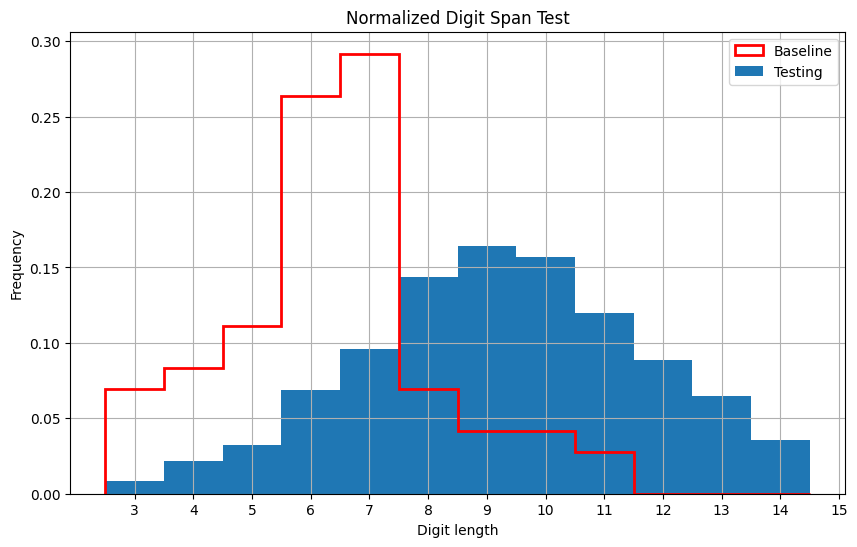

In [18]:
# plot histogram of baseline using plt in range of 1 to 14
plt.figure(figsize=(10, 6))

# normalize to 1 and where outcome is correct
plt.hist(df_testing['digit_length'], bins=range(3, 16), density=True)

plt.title('Normalized Digit Span Test')
plt.xlabel('Digit length')
plt.ylabel('Frequency')

# plot baseline histogram as a line on top
plt.hist(df_baseline['digit_length'], bins=range(3, 16), density=True, histtype='step', color='red', linewidth=2)

# move x tick labels to center of bars
plt.xticks([i + 0.5 for i in range(3, 16)], [i for i in range(3, 16)])

# add legend
plt.legend(['Baseline', 'Testing'])

plt.grid(True)

plt.show()

In [19]:
# descriptive statistics for df_baseline where outcome is correct
df_testing['digit_length'].describe()

count    1962.000000
mean        9.282365
std         2.422650
min         3.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        15.000000
Name: digit_length, dtype: float64

In [20]:
# get further descriptive statistics per user
# get how many unique session_nr does each unique user have
df_testing.groupby('user_name')['session_nr'].nunique()

user_name
wager        4
werbler     26
wobbler     25
wraight     25
wrangler    19
Name: session_nr, dtype: int64

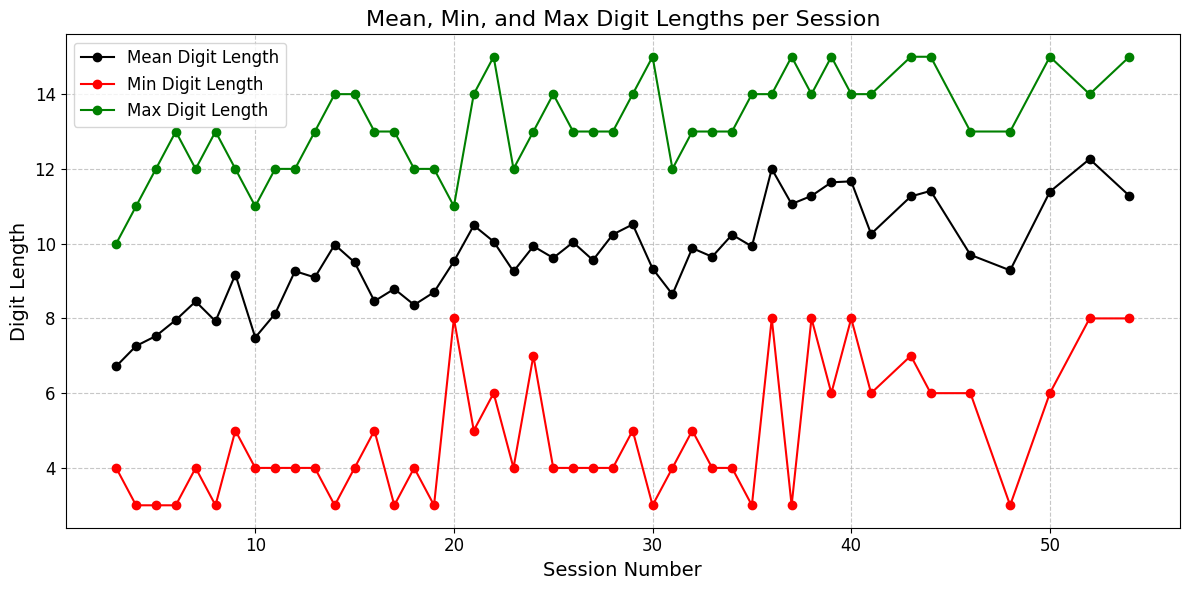

In [26]:
# Grouping data by session_nr and calculating mean, min, and max of digit_length
grouped_data = df_testing.groupby('session_nr')['digit_length'].agg(['mean', 'min', 'max'])

# Plotting the data
plt.figure(figsize=(12, 6))
grouped_data['mean'].plot(label='Mean Digit Length', marker='o', c='black')
grouped_data['min'].plot(label='Min Digit Length', marker='o', c='red')
grouped_data['max'].plot(label='Max Digit Length', marker='o', c='green')

plt.title('Mean, Min, and Max Digit Lengths per Session', fontsize=16)
plt.xlabel('Session Number', fontsize=14)
plt.ylabel('Digit Length', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

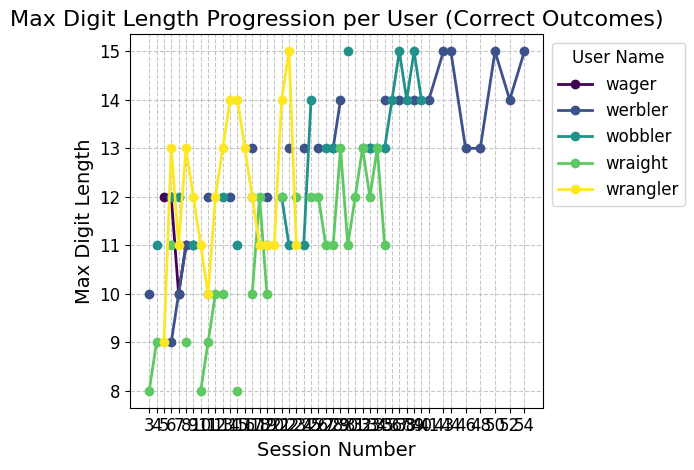

In [22]:
# Grouping data by user_name and session_nr, then calculating max of digit_length
grouped_data_user_session = df_testing.groupby(['user_name', 'session_nr'])['digit_length'].max().unstack()

# Convert session_nr values to numeric
grouped_data_user_session.columns = pd.to_numeric(grouped_data_user_session.columns)

# Plotting the data
plt.figure(figsize=(12, 6))
grouped_data_user_session.T.plot(marker='o', colormap='viridis', linewidth=2)

plt.title('Max Digit Length Progression per User (Correct Outcomes)', fontsize=16)
plt.xlabel('Session Number', fontsize=14)
plt.ylabel('Max Digit Length', fontsize=14)
plt.xticks(grouped_data_user_session.columns, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='User Name', fontsize=12, title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

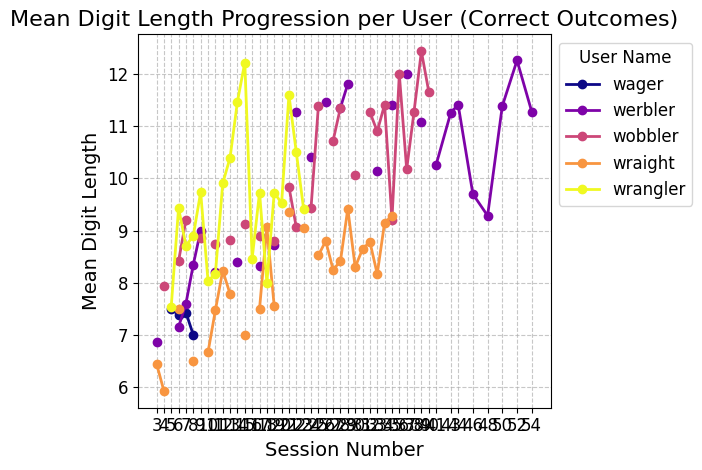

In [23]:
# Grouping data by user_name and session_nr, then calculating mean of digit_length
grouped_data_user_session_mean = df_testing.groupby(['user_name', 'session_nr'])['digit_length'].mean().unstack()

# Ensure session_nr values are numeric-compatible (optional)
grouped_data_user_session_mean.columns = pd.to_numeric(grouped_data_user_session_mean.columns, errors='coerce')

# Plotting the data with the previous figure size
plt.figure(figsize=(12, 6))
grouped_data_user_session_mean.T.plot(marker='o', colormap='plasma', linewidth=2)

plt.title('Mean Digit Length Progression per User (Correct Outcomes)', fontsize=16)
plt.xlabel('Session Number', fontsize=14)
plt.ylabel('Mean Digit Length', fontsize=14)
plt.xticks(grouped_data_user_session_mean.columns, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='User Name', fontsize=12, title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Session accuracy and other factors

In [28]:
df_testing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1962 entries, 47 to 3133
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_name            1962 non-null   object        
 1   date                 1962 non-null   datetime64[ns]
 2   time                 1962 non-null   datetime64[ns]
 3   session_nr           1962 non-null   int32         
 4   loop_nr              1962 non-null   object        
 5   presented_sequence   1962 non-null   object        
 6   recalled_sequence    1803 non-null   object        
 7   outcome              1962 non-null   object        
 8   mistakes_in_a_row    1962 non-null   int32         
 9   recall_time_in_s     1962 non-null   float64       
 10  sound_model          1962 non-null   int32         
 11  digit_length         1962 non-null   int32         
 12  session_time         1962 non-null   datetime64[ns]
 13  time_between_digits  1962 non-null   

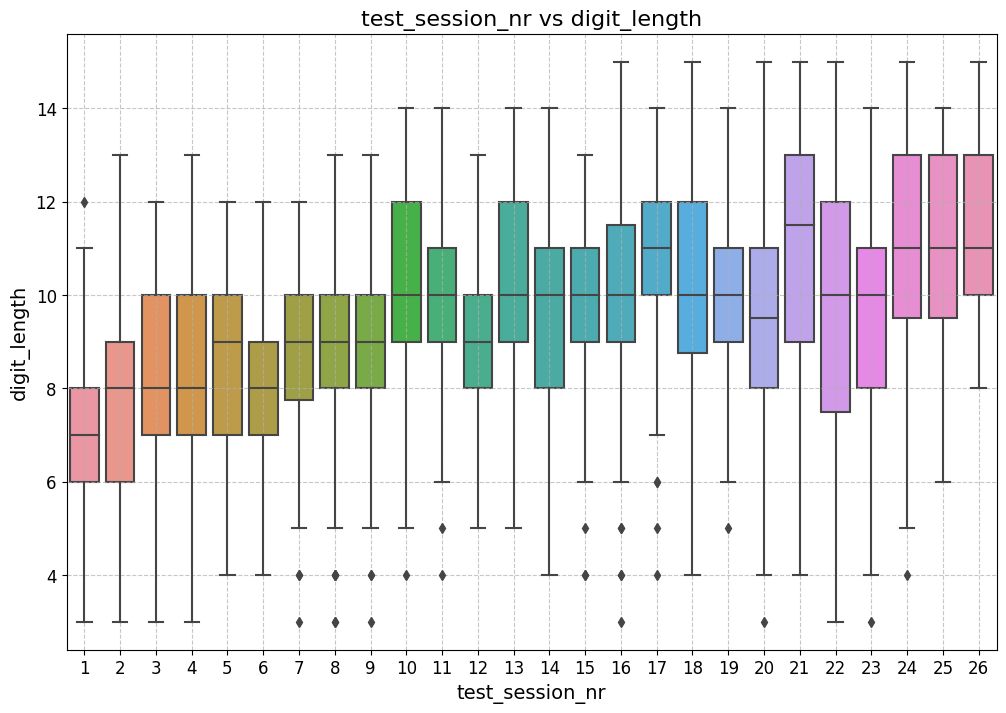

In [56]:
import seaborn as sns

X = 'test_session_nr'
Y = 'digit_length'
data_data = df_mode_2 # df_testing

# Creating a boxplot with motivation on x-axis and digit length on y-axis
plt.figure(figsize=(12, 8))
sns.boxplot(x=X, y=Y, data=data_data)

plt.title(X + ' vs ' + Y, fontsize=16)
plt.xlabel(X, fontsize=14)
plt.ylabel(Y, fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()